# **Import and Install Necessary Packages**

In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

from sklearn.cluster import KMeans

RANDOM_STATE = 1234

# **Load PCD Data and Station Dictionary**

In [2]:
BASE_CLEANED_DATA_PATH = './cleaned_data'
BASE_PROCESSED_DATA_PATH = './processed_data'

#PCD Before
df_before = pd.read_csv(f'{BASE_CLEANED_DATA_PATH}/cleaned_pcd_data_before_all_parts.csv')
df_before['date_time'] = pd.to_datetime(df_before['date_time'], format = '%Y-%m-%d %H:%M')

#PCD After
df_after = pd.read_csv(f'{BASE_CLEANED_DATA_PATH}/cleaned_pcd_data_after.csv')
df_after['date_time'] = pd.to_datetime(df_after['date_time'], format = '%Y-%m-%d %H:%M:%S')

#PCD Before Station
df_before_station = pd.read_csv(f'{BASE_PROCESSED_DATA_PATH}/PCD_DICTIONARY.csv')
#remove first column of df_station (index)
df_before_station = df_before_station.iloc[:, 1:]
#rename column
df_before_station.rename(columns = {'stationId': 'stationID', 'name': 'nameTH'}, inplace = True)

In [3]:
df_before

,stationID,date_time,CO at 3 m (ppm),NO2 at 3 m (ppb),O3 at 3 m (ppb),PM10 at 3 m (microg/m3),PM2_5 at 3 m (microg/m3),RH at 2 m (%),SO2 at 3 m (ppb),Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s)
0,35t,1995-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,86.0,NaN,27.4,249.0,NaN
1,35t,1995-06-04 21:00:00,NaN,NaN,NaN,NaN,NaN,75.0,NaN,29.1,166.0,NaN
2,35t,1995-06-04 22:00:00,NaN,NaN,NaN,NaN,NaN,80.0,NaN,28.4,208.0,NaN
3,35t,1995-06-04 23:00:00,NaN,NaN,NaN,NaN,NaN,84.0,NaN,28.0,194.0,NaN
4,35t,1995-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,87.0,NaN,27.6,168.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5603462,27t,2020-09-30 23:00:00,NaN,19.0,6.0,39.0,24.0,NaN,7.0,27.9,317.0,1.1
5603463,26t_1,2020-09-30 23:00:00,0.42,6.0,NaN,22.0,9.0,NaN,NaN,26.3,281.0,0.6
5603464,25t,2020-09-30 23:00:00,NaN,NaN,4.0,53.0,19.0,NaN,NaN,27.7,192.0,0.6
5603465,31t,2020-09-30 23:00:00,0.48,12.0,5.0,36.0,9.0,94.0,2.0,28.3,301.0,1.0


In [4]:
df_before_station

,stationID,nameTH,lat,long,province,isStationOpen
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,13.732223,100.488104,Bangkok,True
1,03t,ริมถนนกาญจนาภิเษก เขตบางขุนเทียน,13.784051,100.389403,Bangkok,True
2,03t_1,ไปรษณีย์ราษฎร์บูรณะ,13.676073,100.497632,Bangkok,False
3,03t_2,หมวดการทางบางขุนเทียนที่ 2,13.657656,100.426853,Bangkok,False
4,05t,กรมอุตุนิยมวิทยาบางนา,13.667521,100.602844,Bangkok,True
...,...,...,...,...,...,...
81,80t,ศาลากลางจ.สตูล,6.623893,100.064950,Satun,True
82,81t,อ่างเก็บน้ำประปา นครปฐม,13.830377,100.053467,Nakhon Pathom,True
83,82t,สวนสาธารณะหนองถิ่นจ.หนองคาย,17.876890,102.724140,Nong Khai,True
84,83t,ศูนย์แสดงและจำหน่ายสินค้า OTOPจ.อุบลราชธานี,15.244947,104.844019,Ubon Ratchathani,True


In [5]:
df_after

,date_time,stationID,nameTH,nameEN,lat,long,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,province
0,2020-07-20 19:00:00,76t,ศูนย์การศึกษานอกโรงเรียน,"Non-Formal Education Centre, Mea Sot",16.750102,98.591312,8.0,22.0,3.0,0.0,0.12,15.0,1,"ต.แม่ปะ อ.แม่สอด, ตาก","MaePa, MaeSot, Tak",Tak
1,2020-07-20 19:00:00,bkp71t,สำนักงานเขตสวนหลวง,"Suan Luang District Office, Bangkok",13.731051,100.651705,9.0,22.0,0.0,0.0,0.00,0.0,1,"ริมถนนพัฒนาการ เขตสวนหลวง, กรุงเทพฯ","Suan Luang, Bangkok",Bangkok
2,2020-07-20 19:00:00,bkp70t,ริมถนนซอยสุขุมวิท 63,"Soi Sukhumwit 63 Roadside Wattana, Bangkok",13.722096,100.584559,15.0,53.0,0.0,0.0,0.00,0.0,2,"ริมถนนซอยสุขุมวิท 63 เขตวัฒนา, กรุงเทพฯ","Soi Sukhumwit 63 Roadside, Wattana, Bangkok",Bangkok
3,2020-07-20 19:00:00,bkp69t,ธนาคารกรุงศรีอยุธยา สำนักงานใหญ่,"Bank of Ayuthaya Head Office Yan Nawa, Bangkok",13.679226,100.546870,16.0,0.0,0.0,0.0,0.00,0.0,1,"ริมถนนพระราม 3 เขตยานนาวา, กรุงเทพฯ","RamaIII Roadside, Yan Nawa, Bangkok",Bangkok
4,2020-07-20 19:00:00,bkp68t,สี่แยกถนนตก,Thanon Tok Intersection,13.697252,100.497185,23.0,0.0,0.0,0.0,0.00,0.0,1,"ริมถนนพระราม 3-เจริญกรุง เขตบางคอแหลม, กรุงเทพฯ","RamaIII Roadside (Chareon Krung), Bang Kho Lae...",Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,2022-01-30 18:00:00,o23,ศาลากลางจังหวัดชัยภูมิ,Chaiyaphum City Hall,15.808061,102.031993,36.0,0.0,0.0,0.0,0.00,0.0,2,"ต.ในเมือง อ.เมืองชัยภูมิ, ชัยภูมิ","Nai Mueang Subdistrict, Mueang Chaiyaphum Dis...",Chaiyaphum
1748633,2022-01-30 18:00:00,43t,ศูนย์บริการสาธารณสุขเทศบาลภูเก็ต,Municipal Health Center,7.884508,98.391318,16.0,33.0,7.0,1.0,0.38,19.0,1,"ต.ตลาดใหญ่ อ.เมือง, ภูเก็ต","Talat Yai, Mueang, Phuket",Phuket
1748634,2022-01-30 18:00:00,53t,สถานีตำรวจนครบาลโชคชัย,Chokchai Police Station,13.795425,100.593023,22.0,32.0,6.0,0.0,2.22,0.0,1,"ริมถนนลาดพร้าว เขตวังทองหลาง, กรุงเทพฯ","Lat Phrao Rd. Khet Wang Thonglang, Bangkok",Bangkok
1748635,2022-01-30 18:00:00,bkp76t,สำนักงานเขตบางกะปิ,"Bang Kapi District Office, Bangkok",13.766478,100.647785,31.0,0.0,0.0,0.0,0.00,0.0,2,"ริมถนนนวมินทร์ แยกบางกะปิ เขตบางกะปิ, กรุงเทพฯ","Navamin Roadside, Bang Kapi, Bangkok",Bangkok


Extract Station Mapping From PCD After

In [6]:
df_after_staion = df_after.groupby('stationID')[['nameTH', 'nameEN', 'lat', 'long', 'areaTH', 'areaEN', 'province']].first().reset_index()
df_after_staion.sort_values(by = 'stationID', inplace = True)
df_after_staion

,stationID,nameTH,nameEN,lat,long,areaTH,areaEN,province
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,13.732994,100.488239,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",Bangkok
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,13.636514,100.414262,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",Bangkok
2,05t,กรมอุตุนิยมวิทยาบางนา,Thai Meteorological Department,13.666113,100.605741,"แขวงบางนา เขตบางนา, กรุงเทพฯ","Bang Na, Khet Bang Na, Bangkok",Bangkok
3,08t,ศูนย์ฟื้นฟูอาชีพคนพิการและทุพลภาพ,Prabadang Rehabiltation Center,13.664023,100.543406,"ต.ทรงคนอง อ.พระประแดง, สมุทรปราการ","Song Kanong, Phra Pradaeng, Samut Prakan",Samut Prakan
4,10t,เคหะชุมชนคลองจั่น,National Housing Authority Klongchan,13.779539,100.645654,"แขวงคลองจั่น เขตบางกะปิ, กรุงเทพฯ","Khlong Chan, Khet Bang Kapi, Bangkok",Bangkok
...,...,...,...,...,...,...,...,...
146,o31,โรงพยาบาลแม่แจ่ม,Mae Chaem Hospital,18.498300,98.364900,"ต.ช่างเคิ่ง อ.แม่แจ่ม, เชียงใหม่","Mae Chaem,Chiang Mai",Chiang Mai
147,o32,สนามกีฬาตากสินเทศบาลเมืองตาก,"Taksin Stadium, Muang Tak Municipality",16.883611,99.123056,"ต.ระแหง อ.เมือง, ตาก","Tambon Rahaeng, Amphoe Mueang, Tak",Tak
148,o33,โรงเรียนบ้านป่าบง,Ban Pa Bong School,19.336111,98.954444,"ต.แม่นะ อ.เชียงดาว, เชียงใหม่","Mae Na Subdistrict, Chiang Dao District, Chian...",Chiang Mai
149,o59,หอวัฒนธรรมนครบาลเพชรบูรณ์,Nakhonban Phetchabun Cultural Hall,16.419884,101.160035,"ต.ในเมือง อ.เมือง, เพชรบูรณ์","Nai Mueang Subdistrict, Mueang District, Phet...",Phetchabun


# **Combining PCD Before and After Data**

Since PCD Before date_time range is between 1995-06-04 00:00:00 to 2020-09-30 23:00:00
We will bring PCD after only date >= 2020-10-01 00:00:00 to concat with PCD before

In [7]:
def mapping_column_name(c):
    if c in ["CO at 3 m (ppm)"]:
        return "CO"
    elif c in ["NO2 at 3 m (ppb)"]:
        return "NO2"
    elif c in ["O3 at 3 m (ppb)"]:
        return "O3"
    elif c in ["PM10 at 3 m (microg/m3)"]:
        return "PM10"
    elif c in ["PM2_5 at 3 m (microg/m3)", "PM25"]:
        return "PM2_5"
    elif c in ["SO2 at 3 m (ppb)"]:
        return "SO2"
    else:
        return c

In [8]:
#In PCD Before -> map longitude, latitude, province
mapping_column = ['lat', 'long', 'province']
for c in mapping_column:
    mapping_dict = dict(df_before_station.set_index('stationID')[c])
    df_before[c] = df_before['stationID'].map(mapping_dict)

# change column name in PCD_Before
new_col_names = list(map(lambda c: mapping_column_name(c), df_before.columns))
df_before.columns = new_col_names

# add column that indicate 'after' or 'before'
df_before['source'] = 'before'

df_before

,stationID,date_time,CO,NO2,O3,PM10,PM2_5,RH at 2 m (%),SO2,Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s),lat,long,province,source
0,35t,1995-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,86.0,NaN,27.4,249.0,NaN,18.815423,98.957566,Chiang Mai,before
1,35t,1995-06-04 21:00:00,NaN,NaN,NaN,NaN,NaN,75.0,NaN,29.1,166.0,NaN,18.815423,98.957566,Chiang Mai,before
2,35t,1995-06-04 22:00:00,NaN,NaN,NaN,NaN,NaN,80.0,NaN,28.4,208.0,NaN,18.815423,98.957566,Chiang Mai,before
3,35t,1995-06-04 23:00:00,NaN,NaN,NaN,NaN,NaN,84.0,NaN,28.0,194.0,NaN,18.815423,98.957566,Chiang Mai,before
4,35t,1995-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,87.0,NaN,27.6,168.0,NaN,18.815423,98.957566,Chiang Mai,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603462,27t,2020-09-30 23:00:00,NaN,19.0,6.0,39.0,24.0,NaN,7.0,27.9,317.0,1.1,13.549535,100.262835,Samut Sakhon,before
5603463,26t_1,2020-09-30 23:00:00,0.42,6.0,NaN,22.0,9.0,NaN,NaN,26.3,281.0,0.6,13.523801,99.811871,Ratchaburi,before
5603464,25t,2020-09-30 23:00:00,NaN,NaN,4.0,53.0,19.0,NaN,NaN,27.7,192.0,0.6,14.526613,100.923446,Saraburi,before
5603465,31t,2020-09-30 23:00:00,0.48,12.0,5.0,36.0,9.0,94.0,2.0,28.3,301.0,1.0,12.732951,101.132847,Rayong,before


In [9]:
#PCD After (interested only date >= 2010-10-01)
df_after = df_after[df_after['date_time'] >= '2020-10-01'].copy()

# change column name in PCD_After
new_col_names = list(map(lambda c: mapping_column_name(c), df_after.columns))
df_after.columns = new_col_names

interested_columns = ['stationID', 'date_time', 'CO', 'NO2', 'O3', 'PM10', 'PM2_5', 'SO2', 'AQI', 'lat', 'long', 'province']
df_after = df_after[interested_columns]

# add column that indicate 'after' or 'before'
df_after['source'] = 'after'

df_after

,stationID,date_time,CO,NO2,O3,PM10,PM2_5,SO2,AQI,lat,long,province,source
194673,31t,2020-10-01 00:00:00,0.37,10.0,8.0,26.0,7.0,2.0,1,12.735114,101.135620,Rayong,after
194674,bkp82t,2020-10-01 00:00:00,0.00,0.0,0.0,0.0,18.0,0.0,1,13.705150,100.484650,Bangkok,after
194675,44t,2020-10-01 00:00:00,0.41,18.0,6.0,49.0,27.0,1.0,2,7.020545,100.484040,Songkhla,after
194676,14t,2020-10-01 00:00:00,0.58,16.0,2.0,31.0,18.0,18.0,1,13.705458,100.315675,Samut Sakhon,after
194677,bkp104t,2020-10-01 00:00:00,0.00,0.0,0.0,26.0,14.0,0.0,1,13.696314,100.409049,Bangkok,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,o23,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,36.0,0.0,2,15.808061,102.031993,Chaiyaphum,after
1748633,43t,2022-01-30 18:00:00,0.38,7.0,19.0,33.0,16.0,1.0,1,7.884508,98.391318,Phuket,after
1748634,53t,2022-01-30 18:00:00,2.22,6.0,0.0,32.0,22.0,0.0,1,13.795425,100.593023,Bangkok,after
1748635,bkp76t,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,31.0,0.0,2,13.766478,100.647785,Bangkok,after


Check intercept columns that its values are in the same range?

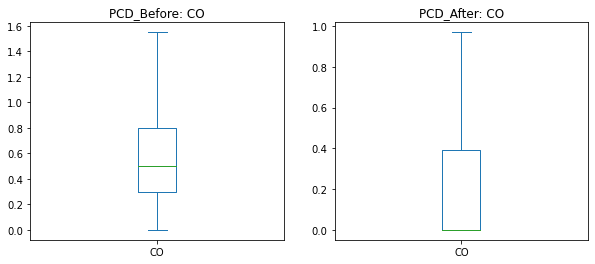

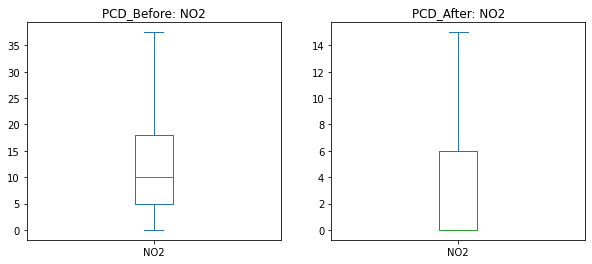

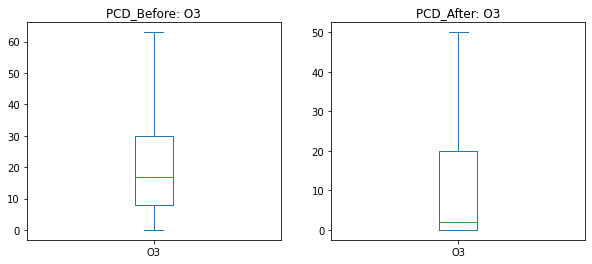

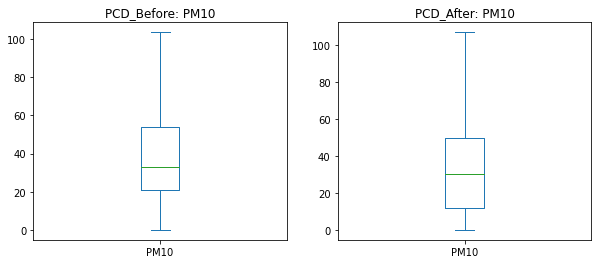

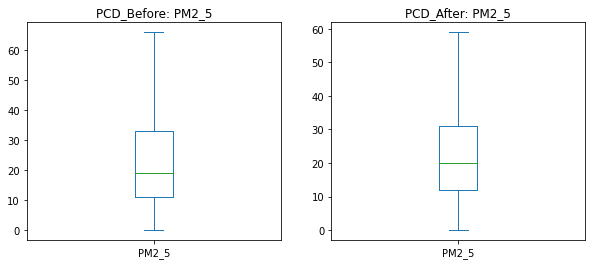

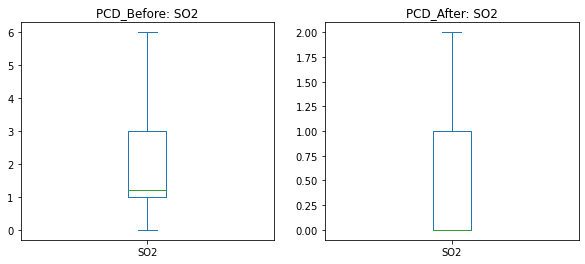

In [10]:
show_outliers = False
co_columns = sorted(set(df_before.columns).intersection(set(df_after.columns)).difference(set(['province', 'lat', 'date_time', 'long', 'stationID', 'source'])))
for c in co_columns:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    df_before[c].plot(kind = 'box', showfliers = show_outliers, ax = ax[0])
    ax[0].set_title(f"PCD_Before: {c}")

    df_after[c].plot(kind = 'box', showfliers = show_outliers, ax = ax[1])
    ax[1].set_title(f"PCD_After: {c}")

    plt.show()

Concat PCD Before and After

In [11]:
df_combined = pd.concat([df_before, df_after], axis = 0)

#add year and month column
df_combined['year'] = df_combined['date_time'].dt.year
df_combined['month'] = df_combined['date_time'].dt.month

#map province name to same format
def map_province_name(p):
    if p in ['Chon Buri', 'Chon buri', 'Chonburi']:
        return 'Chonburi'
    elif p in ['Prachin Buri', 'Prachinburi']:
        return 'Prachinburi'
    elif p in ['Suphan Buri', 'Suphun Buri']:
        return "Suphan Buri"
    elif p in ['Pattanee']:
        return 'Pattani'
    elif p in ['Phangnga']:
        return 'Phang Nga'
    else:
        return p
df_combined['province'] = df_combined['province'].map(map_province_name)

df_combined

,stationID,date_time,CO,NO2,O3,PM10,PM2_5,RH at 2 m (%),SO2,Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s),lat,long,province,source,AQI,year,month
0,35t,1995-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,86.0,NaN,27.4,249.0,NaN,18.815423,98.957566,Chiang Mai,before,NaN,1995,6
1,35t,1995-06-04 21:00:00,NaN,NaN,NaN,NaN,NaN,75.0,NaN,29.1,166.0,NaN,18.815423,98.957566,Chiang Mai,before,NaN,1995,6
2,35t,1995-06-04 22:00:00,NaN,NaN,NaN,NaN,NaN,80.0,NaN,28.4,208.0,NaN,18.815423,98.957566,Chiang Mai,before,NaN,1995,6
3,35t,1995-06-04 23:00:00,NaN,NaN,NaN,NaN,NaN,84.0,NaN,28.0,194.0,NaN,18.815423,98.957566,Chiang Mai,before,NaN,1995,6
4,35t,1995-06-05 00:00:00,NaN,NaN,NaN,NaN,NaN,87.0,NaN,27.6,168.0,NaN,18.815423,98.957566,Chiang Mai,before,NaN,1995,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,o23,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,36.0,NaN,0.0,NaN,NaN,NaN,15.808061,102.031993,Chaiyaphum,after,2.0,2022,1
1748633,43t,2022-01-30 18:00:00,0.38,7.0,19.0,33.0,16.0,NaN,1.0,NaN,NaN,NaN,7.884508,98.391318,Phuket,after,1.0,2022,1
1748634,53t,2022-01-30 18:00:00,2.22,6.0,0.0,32.0,22.0,NaN,0.0,NaN,NaN,NaN,13.795425,100.593023,Bangkok,after,1.0,2022,1
1748635,bkp76t,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,31.0,NaN,0.0,NaN,NaN,NaN,13.766478,100.647785,Bangkok,after,2.0,2022,1


# **Observe Merged PCD Data**

How many unique stations are the data collected from each year?

There are total of 169 stations.


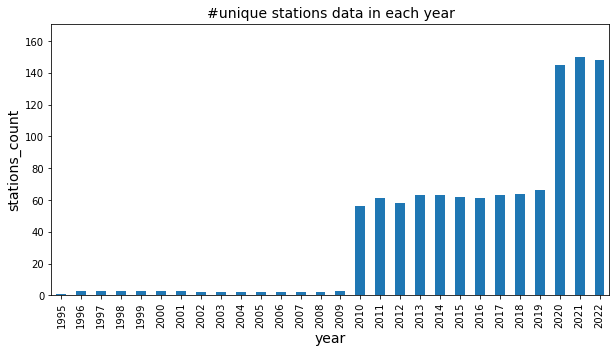

In [12]:
total_stations = df_combined['stationID'].nunique()
print(f"There are total of {total_stations} stations.")

plt.figure(figsize = (10, 5))
df_combined.groupby('year')['stationID'].nunique().plot(kind = 'bar')
plt.xlabel('year', fontsize = 14)
plt.ylabel('stations_count', fontsize = 14)
plt.title('#unique stations data in each year', fontsize = 14)
plt.ylim([0, total_stations+2])
plt.show()

The relative cumulative frequncy of data each year

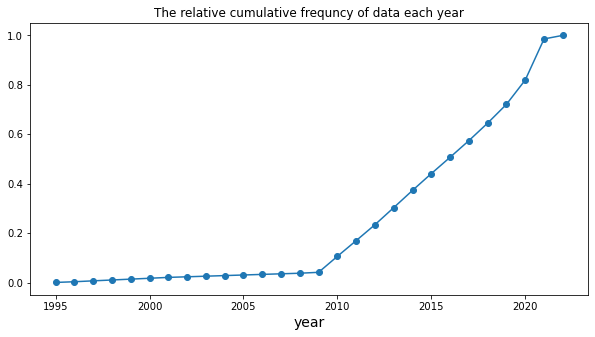

In [13]:
cumulative_data_y = df_combined['year'].value_counts(normalize = True).sort_index().cumsum()

plt.figure(figsize = (10, 5))
plt.plot(cumulative_data_y.index, cumulative_data_y)
plt.scatter(cumulative_data_y.index, cumulative_data_y)
plt.xlabel('year', fontsize = 14)
plt.title('The relative cumulative frequncy of data each year')
plt.show()

## Consider only data after year 2010

In [14]:
df_combined_2010 = df_combined[df_combined['year'] >= 2010].copy()
df_combined_2010

,stationID,date_time,CO,NO2,O3,PM10,PM2_5,RH at 2 m (%),SO2,Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s),lat,long,province,source,AQI,year,month
297542,44t,2010-01-01 00:00:00,0.10,1.0,19.0,28.0,NaN,79.0,1.0,NaN,62.0,3.5,7.009515,100.443620,Songkhla,before,NaN,2010,1
297543,43t,2010-01-01 00:00:00,0.30,14.0,12.0,37.0,NaN,80.0,0.0,28.1,48.0,0.9,7.872690,98.373793,Phuket,before,NaN,2010,1
297544,41t_1,2010-01-01 00:00:00,1.10,25.0,14.0,77.0,NaN,77.0,3.0,NaN,260.0,0.6,15.686298,100.101309,Nakhon Sawan,before,NaN,2010,1
297545,40t,2010-01-01 00:00:00,0.58,3.0,11.0,14.0,NaN,83.0,2.0,20.7,303.0,0.0,18.279155,99.435664,Lampang,before,NaN,2010,1
297546,35t,2010-01-01 00:00:00,0.50,18.0,2.0,23.0,NaN,77.0,0.0,18.3,NaN,NaN,18.815423,98.957566,Chiang Mai,before,NaN,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,o23,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,36.0,NaN,0.0,NaN,NaN,NaN,15.808061,102.031993,Chaiyaphum,after,2.0,2022,1
1748633,43t,2022-01-30 18:00:00,0.38,7.0,19.0,33.0,16.0,NaN,1.0,NaN,NaN,NaN,7.884508,98.391318,Phuket,after,1.0,2022,1
1748634,53t,2022-01-30 18:00:00,2.22,6.0,0.0,32.0,22.0,NaN,0.0,NaN,NaN,NaN,13.795425,100.593023,Bangkok,after,1.0,2022,1
1748635,bkp76t,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,31.0,NaN,0.0,NaN,NaN,NaN,13.766478,100.647785,Bangkok,after,2.0,2022,1


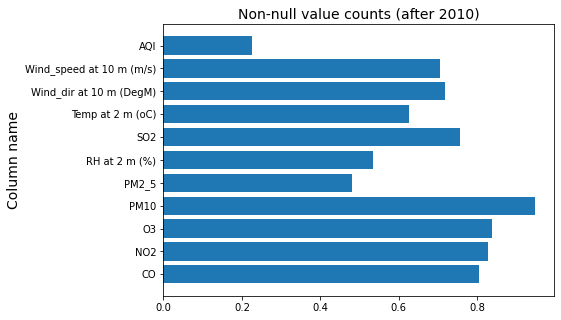

In [15]:
feature_cols = ['CO', 'NO2', 'O3', 'PM10', 'PM2_5', 'RH at 2 m (%)', 'SO2', 'Temp at 2 m (oC)', 'Wind_dir at 10 m (DegM)', 'Wind_speed at 10 m (m/s)', 'AQI']

non_null_ratio = df_combined_2010.notna().sum(axis = 0).loc[feature_cols] / df_combined_2010.shape[0]

plt.figure(figsize = (7, 5))
plt.ylabel('Column name', fontsize = 14)
plt.barh(non_null_ratio.index, non_null_ratio)
plt.title(f"Non-null value counts (after 2010)", fontsize = 14)
plt.show()


Drop AQI column since it is missing > 70%

In [16]:
df_combined_2010.drop(columns = ['AQI'], inplace = True)
feature_cols.remove('AQI')

Consider Non-Null Value count in each year

In [17]:
non_null_count = df_combined_2010.groupby('year')[['date_time'] + feature_cols].count()
non_null_count = non_null_count.div(non_null_count['date_time'].values, axis = 0).round(2).loc[:, feature_cols]

non_null_count 

,CO,NO2,O3,PM10,PM2_5,RH at 2 m (%),SO2,Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s)
year,,,,,,,,,,
2010,0.94,0.85,0.88,0.96,0.00,0.82,0.85,0.80,0.88,0.86
2011,0.87,0.75,0.78,0.91,0.03,0.81,0.75,0.80,0.90,0.86
2012,0.85,0.71,0.76,0.90,0.07,0.84,0.70,0.82,0.91,0.88
2013,0.83,0.76,0.80,0.93,0.08,0.82,0.73,0.83,0.95,0.93
2014,0.78,0.77,0.80,0.94,0.13,0.74,0.73,0.84,0.95,0.93
2015,0.66,0.69,0.76,0.91,0.19,0.62,0.64,0.84,0.93,0.92
2016,0.68,0.76,0.78,0.93,0.24,0.58,0.66,0.78,0.93,0.92
2017,0.67,0.82,0.80,0.91,0.36,0.57,0.66,0.77,0.94,0.94
2018,0.66,0.83,0.79,0.93,0.54,0.59,0.65,0.79,0.93,0.92


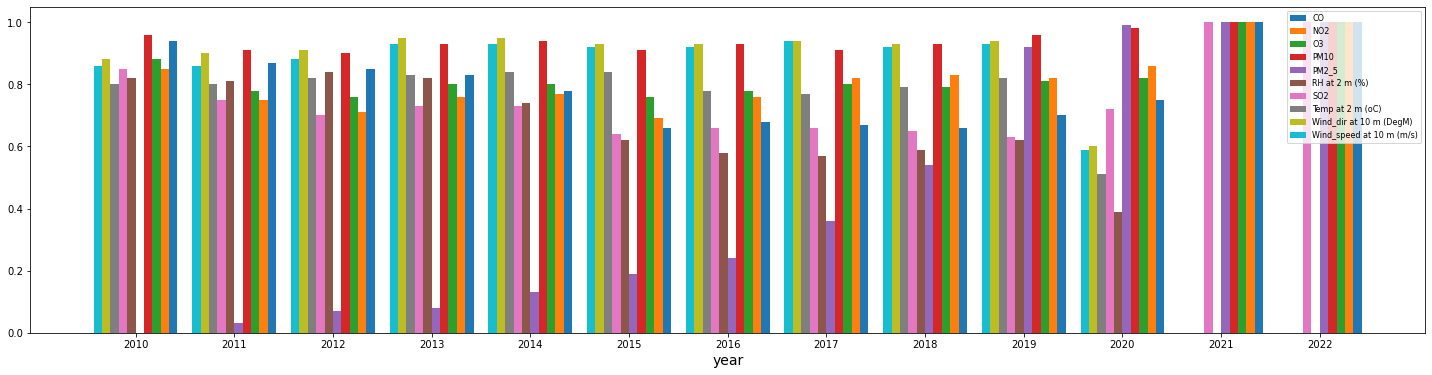

In [18]:
width = 0.17
labels = non_null_count.index
x = np.arange(0, 2*len(labels), 2)

plt.figure(figsize = (25, 6))
for (idx, c) in enumerate(non_null_count.columns):
    plt.bar(x-(idx-4.5)*width, non_null_count.loc[:, c], width, label = c)
plt.legend(fontsize = 8)
plt.xticks(x, labels)
plt.xlabel('year', fontsize = 14)
plt.show()

In [33]:
df_combined_2010

,stationID,date_time,CO,NO2,O3,PM10,PM2_5,RH at 2 m (%),SO2,Temp at 2 m (oC),Wind_dir at 10 m (DegM),Wind_speed at 10 m (m/s),lat,long,province,source,year,month
297542,44t,2010-01-01 00:00:00,0.10,1.0,19.0,28.0,NaN,79.0,1.0,NaN,62.0,3.5,7.009515,100.443620,Songkhla,before,2010,1
297543,43t,2010-01-01 00:00:00,0.30,14.0,12.0,37.0,NaN,80.0,0.0,28.1,48.0,0.9,7.872690,98.373793,Phuket,before,2010,1
297544,41t_1,2010-01-01 00:00:00,1.10,25.0,14.0,77.0,NaN,77.0,3.0,NaN,260.0,0.6,15.686298,100.101309,Nakhon Sawan,before,2010,1
297545,40t,2010-01-01 00:00:00,0.58,3.0,11.0,14.0,NaN,83.0,2.0,20.7,303.0,0.0,18.279155,99.435664,Lampang,before,2010,1
297546,35t,2010-01-01 00:00:00,0.50,18.0,2.0,23.0,NaN,77.0,0.0,18.3,NaN,NaN,18.815423,98.957566,Chiang Mai,before,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,o23,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,36.0,NaN,0.0,NaN,NaN,NaN,15.808061,102.031993,Chaiyaphum,after,2022,1
1748633,43t,2022-01-30 18:00:00,0.38,7.0,19.0,33.0,16.0,NaN,1.0,NaN,NaN,NaN,7.884508,98.391318,Phuket,after,2022,1
1748634,53t,2022-01-30 18:00:00,2.22,6.0,0.0,32.0,22.0,NaN,0.0,NaN,NaN,NaN,13.795425,100.593023,Bangkok,after,2022,1
1748635,bkp76t,2022-01-30 18:00:00,0.00,0.0,0.0,0.0,31.0,NaN,0.0,NaN,NaN,NaN,13.766478,100.647785,Bangkok,after,2022,1


# Consider Average PM2.5 by month for each province (Year >= 2018)

In [34]:
df_combined_2018 = df_combined_2010[df_combined_2010['year'] >= 2018].copy()

pm25_year_avg = df_combined_2018.groupby(['year', 'month', 'province'])['PM2_5'].mean().to_frame().reset_index()
pm25_year_avg['date'] = pm25_year_avg['year'].astype('string') + '-' + pm25_year_avg['month'].astype('string')
pm25_year_avg['date'] = pd.to_datetime(pm25_year_avg['date'], format = '%Y-%m').dt.to_period('M')

pm25_year_avg = pm25_year_avg.pivot(index = 'date', columns = 'province', values = 'PM2_5').round(2)

#drop columns (province) that has all NaN values
pm25_year_avg.dropna(axis = 1, how = 'all', inplace = True)

pm25_year_avg = pm25_year_avg.resample('M').mean()

pm25_year_avg.rename(columns = {'Chon buri': 'Chonburi'}, inplace = True)
pm25_year_avg

province,Bangkok,Bueng Kan,Buriram,Chachoengsao,Chaiyaphum,Chiang Mai,Chiang Rai,Chonburi,Kalasin,Kamphaeng Phet,...,Suphan Buri,Surat Thani,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala
date,,,,,,,,,,,,,,,,,,,,,
2018-01,36.24,NaN,NaN,NaN,NaN,28.42,15.46,43.99,NaN,NaN,...,NaN,14.04,41.18,NaN,NaN,NaN,NaN,NaN,NaN,19.24
2018-02,47.46,NaN,NaN,NaN,NaN,51.04,NaN,44.77,NaN,NaN,...,NaN,NaN,59.43,NaN,NaN,NaN,NaN,NaN,NaN,25.89
2018-03,31.29,NaN,NaN,NaN,NaN,72.86,NaN,30.19,NaN,NaN,...,NaN,NaN,75.14,NaN,NaN,NaN,NaN,NaN,NaN,21.50
2018-04,23.92,NaN,NaN,NaN,NaN,48.63,NaN,20.46,NaN,NaN,...,NaN,NaN,42.52,NaN,NaN,NaN,NaN,NaN,NaN,20.76
2018-05,17.01,NaN,NaN,NaN,NaN,20.10,NaN,16.26,NaN,NaN,...,NaN,NaN,12.71,NaN,NaN,NaN,NaN,NaN,NaN,17.03
2018-06,14.99,NaN,NaN,NaN,NaN,16.84,NaN,13.65,NaN,NaN,...,NaN,NaN,10.42,NaN,NaN,NaN,NaN,NaN,NaN,21.68
2018-07,17.20,NaN,NaN,NaN,NaN,15.27,8.65,13.79,NaN,NaN,...,NaN,NaN,9.97,NaN,NaN,NaN,NaN,NaN,NaN,22.79
2018-08,16.75,NaN,NaN,NaN,NaN,15.69,37.81,14.52,NaN,NaN,...,NaN,NaN,10.40,NaN,NaN,NaN,NaN,NaN,NaN,22.98
2018-09,19.73,NaN,NaN,NaN,NaN,13.01,14.66,15.81,NaN,NaN,...,NaN,NaN,13.80,NaN,NaN,NaN,NaN,NaN,NaN,14.89


In [21]:
pm25_year_avg.to_csv('./processed_data/month_avg_pm25_PCD.csv')

In [22]:
pm25_year_avg.head(25)

province,Bangkok,Bueng Kan,Buriram,Chachoengsao,Chaiyaphum,Chiang Mai,Chiang Rai,Chonburi,Kalasin,Kamphaeng Phet,...,Suphan Buri,Surat Thani,Tak,Trang,Trat,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala
date,,,,,,,,,,,,,,,,,,,,,
2018-01,36.24,NaN,NaN,NaN,NaN,28.42,15.46,43.99,NaN,NaN,...,NaN,14.04,41.18,NaN,NaN,NaN,NaN,NaN,NaN,19.24
2018-02,47.46,NaN,NaN,NaN,NaN,51.04,NaN,44.77,NaN,NaN,...,NaN,NaN,59.43,NaN,NaN,NaN,NaN,NaN,NaN,25.89
2018-03,31.29,NaN,NaN,NaN,NaN,72.86,NaN,30.19,NaN,NaN,...,NaN,NaN,75.14,NaN,NaN,NaN,NaN,NaN,NaN,21.50
2018-04,23.92,NaN,NaN,NaN,NaN,48.63,NaN,20.46,NaN,NaN,...,NaN,NaN,42.52,NaN,NaN,NaN,NaN,NaN,NaN,20.76
2018-05,17.01,NaN,NaN,NaN,NaN,20.10,NaN,16.26,NaN,NaN,...,NaN,NaN,12.71,NaN,NaN,NaN,NaN,NaN,NaN,17.03
2018-06,14.99,NaN,NaN,NaN,NaN,16.84,NaN,13.65,NaN,NaN,...,NaN,NaN,10.42,NaN,NaN,NaN,NaN,NaN,NaN,21.68
2018-07,17.20,NaN,NaN,NaN,NaN,15.27,8.65,13.79,NaN,NaN,...,NaN,NaN,9.97,NaN,NaN,NaN,NaN,NaN,NaN,22.79
2018-08,16.75,NaN,NaN,NaN,NaN,15.69,37.81,14.52,NaN,NaN,...,NaN,NaN,10.40,NaN,NaN,NaN,NaN,NaN,NaN,22.98
2018-09,19.73,NaN,NaN,NaN,NaN,13.01,14.66,15.81,NaN,NaN,...,NaN,NaN,13.80,NaN,NaN,NaN,NaN,NaN,NaN,14.89


Plot PM2.5 along each month in each year (plot only province that has non-null value > 80%)

In [35]:
def plot_average_monthly_PM25(pm25_year_avg, province):
    df = pm25_year_avg.loc[:, province].to_frame()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df = df.pivot(index = 'year', columns = 'month', values = province)

    plt.figure(figsize = (7, 4))
    for y in df.index:
        plt.plot(df.columns, df.loc[y, :], label = y)
    plt.title(province, fontsize = 14)
    plt.xlabel('month', fontsize = 12)
    plt.ylabel('PM2.5 (microg/m3)', fontsize = 12)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

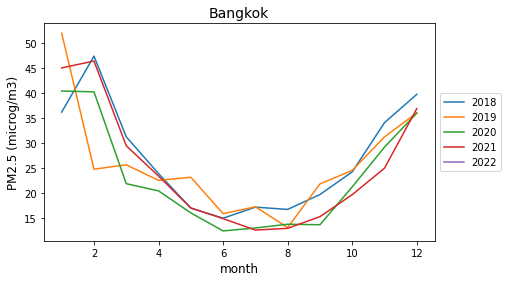

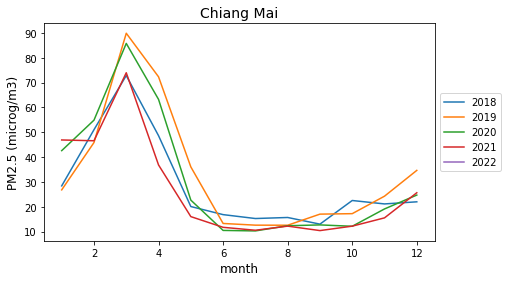

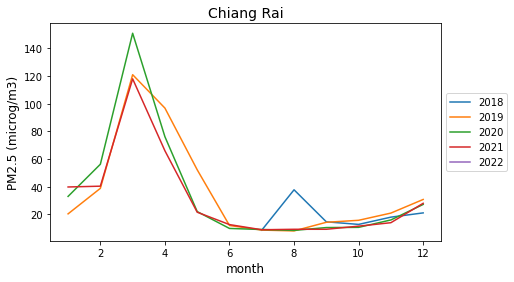

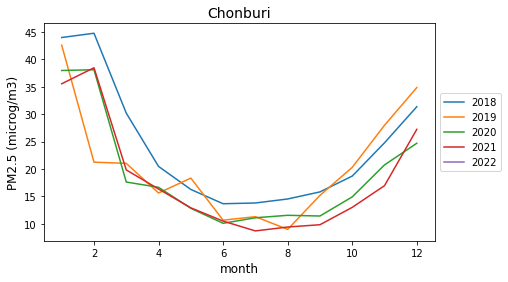

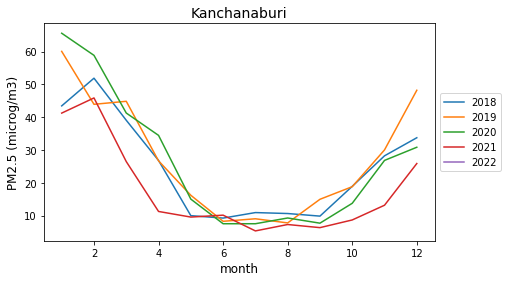

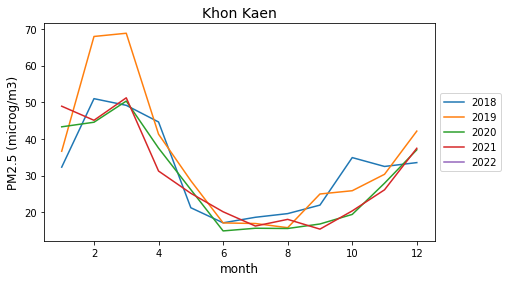

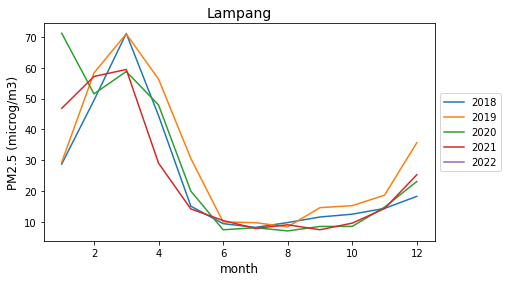

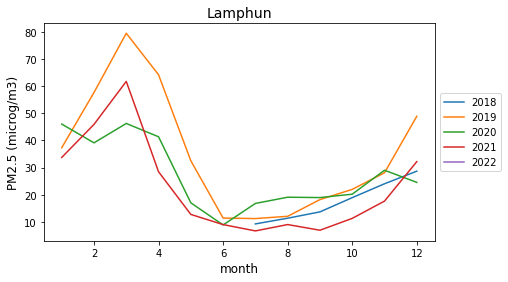

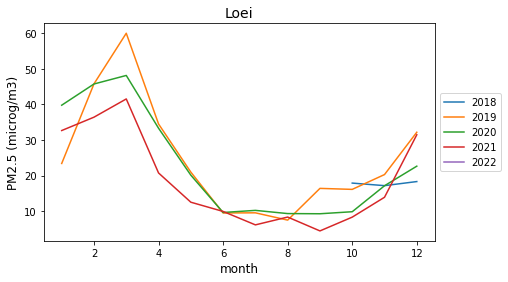

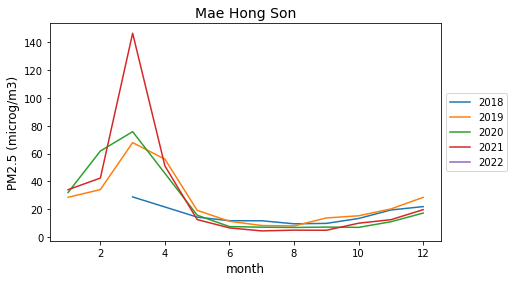

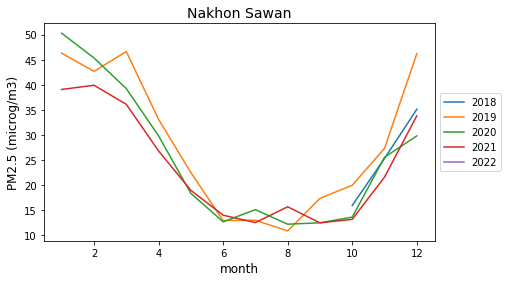

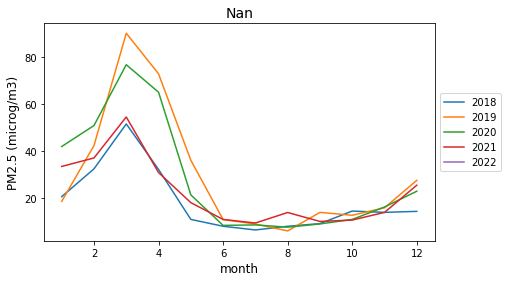

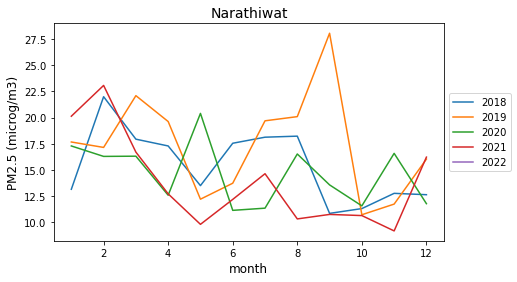

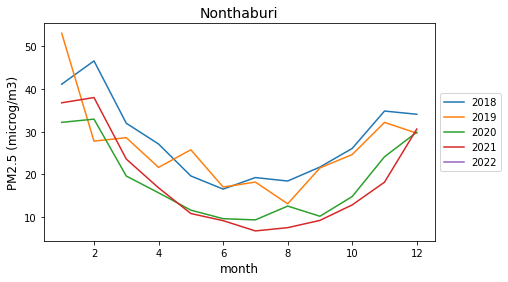

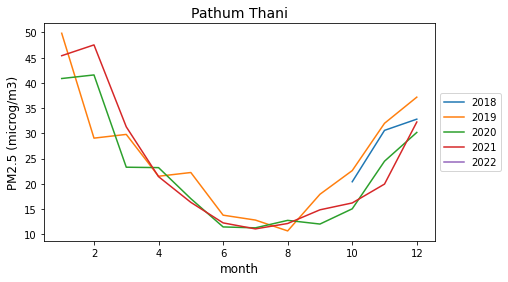

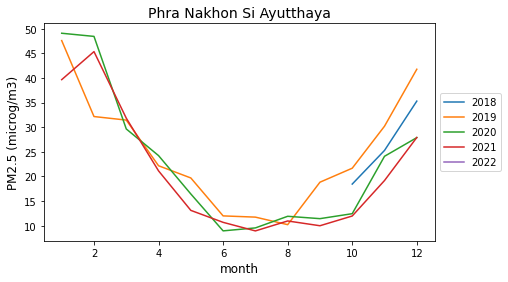

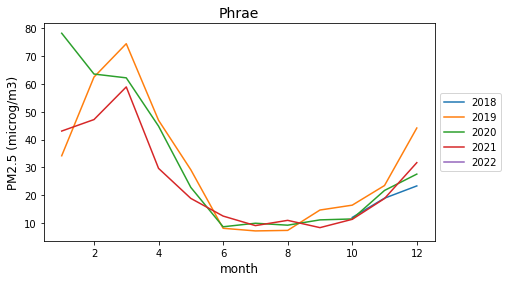

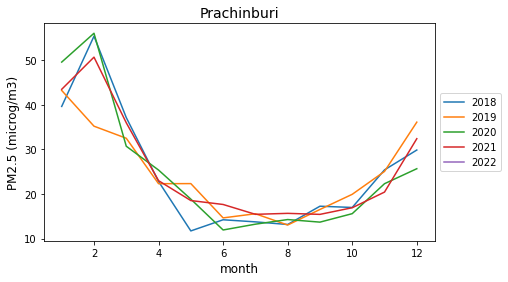

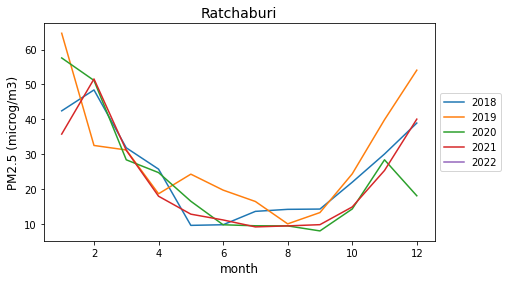

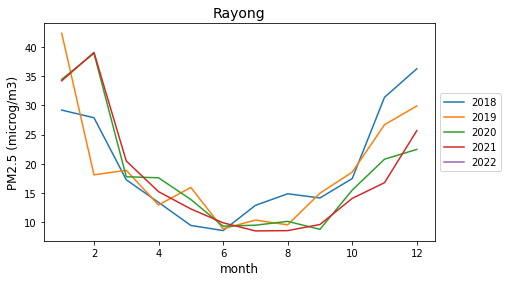

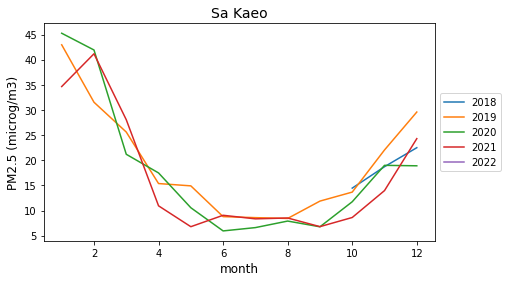

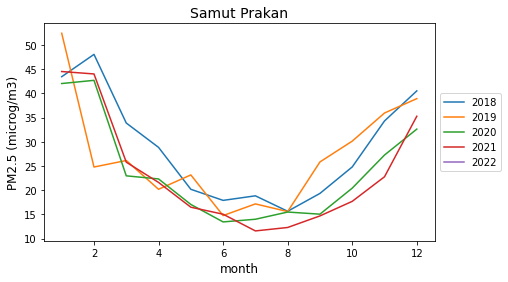

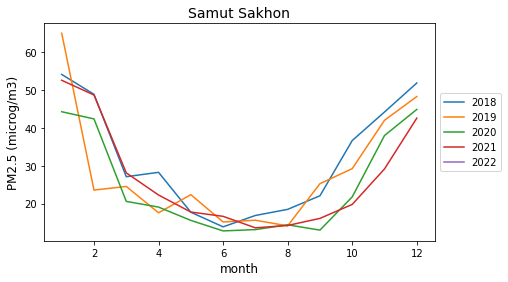

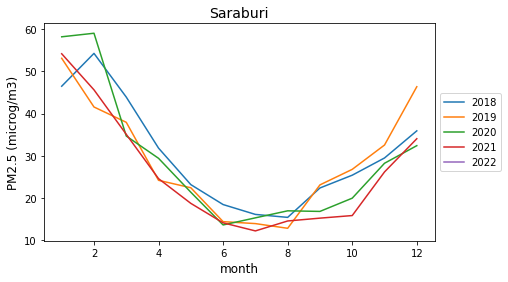

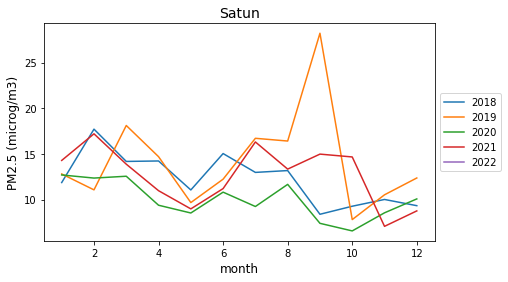

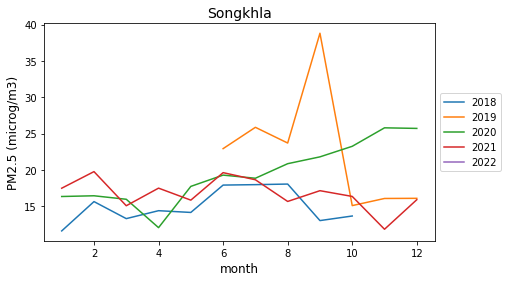

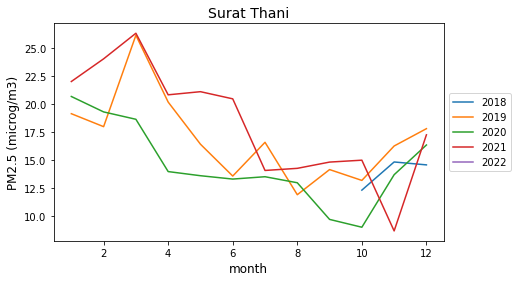

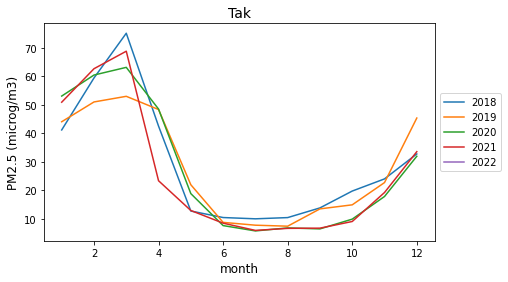

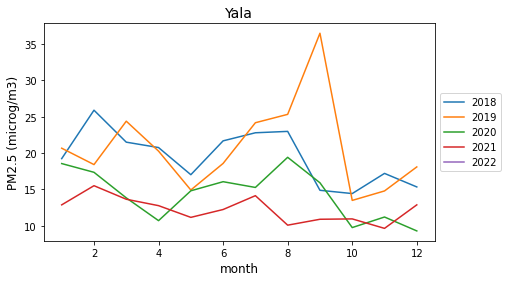

In [36]:
interested_provinces = pm25_year_avg.columns[(pm25_year_avg.notna().sum(axis = 0) / pm25_year_avg.shape[0]) > 0.8]
for province in interested_provinces:
    plot_average_monthly_PM25(pm25_year_avg, province)

Plot PM2.5 Monthly (plot only province that has non-null value > 80%)

In [37]:
df_province_region = pd.read_csv('./processed_data/mapping_thailand_province_with_region_and_location.csv')
df_province_region

,ProvinceTH,ProvinceEN,Region,lat,long
0,กระบี่,Krabi,Southern,8.040629,98.713073
1,กรุงเทพมหานคร,Bangkok,Bangkok Metropolitan,13.725108,100.352245
2,กาญจนบุรี,Kanchanaburi,Western,14.036244,99.040670
3,กาฬสินธุ์,Kalasin,Northeastern,16.642820,103.107245
4,กำแพงเพชร,Kamphaeng Phet,Central,16.395103,98.951658
...,...,...,...,...,...
72,เพชรบุรี,Phetchaburi,Western,12.954423,99.324372
73,เพชรบูรณ์,Phetchabun,Central,16.248765,100.652375
74,เลย,Loei,Northeastern,17.487419,100.932519
75,แพร่,Phrae,Northern,18.262051,99.397629


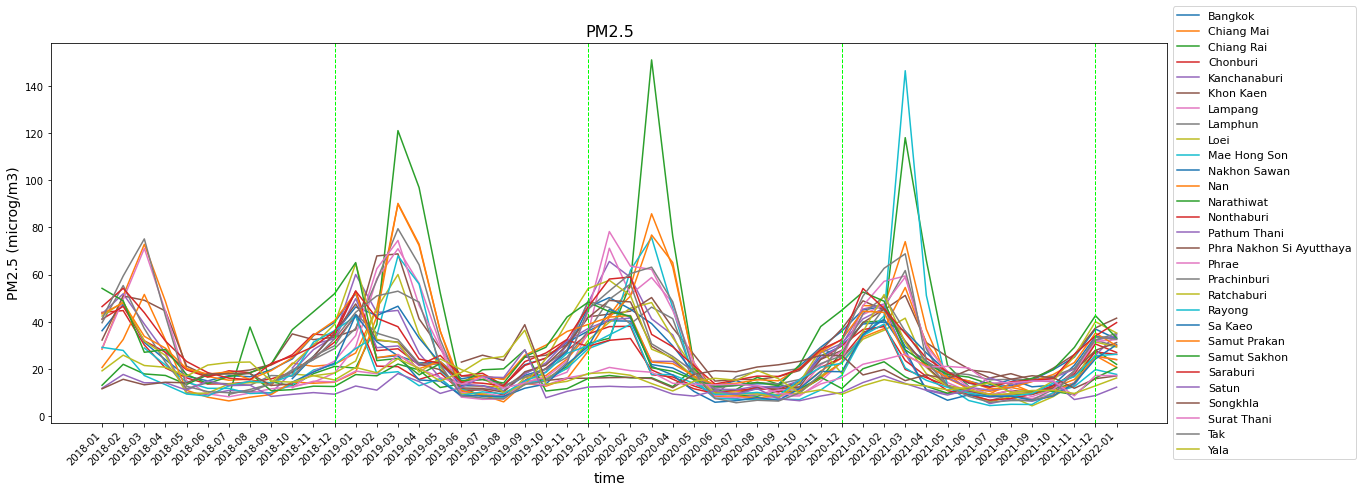

In [38]:
x = np.arange(pm25_year_avg.shape[0])
plt.figure(figsize = (20, 7))
for province in interested_provinces:
    plt.plot(x, pm25_year_avg[province].values, label = province)

#plot lime dash line at the end of the year (Q4)
x_end_year = x[pm25_year_avg.index.month == 12]
for xx in x_end_year:
    plt.axvline(x = xx, linestyle = '--', color = 'lime', linewidth = 1.0)

plt.ylabel('PM2.5 (microg/m3)', fontsize = 14)
plt.xlabel('time', fontsize = 14)
plt.xticks(x, pm25_year_avg.index, rotation = 45, ha = 'right')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize = 11)
plt.title('PM2.5', fontsize = 16)
plt.show()

Separate Regions by colors

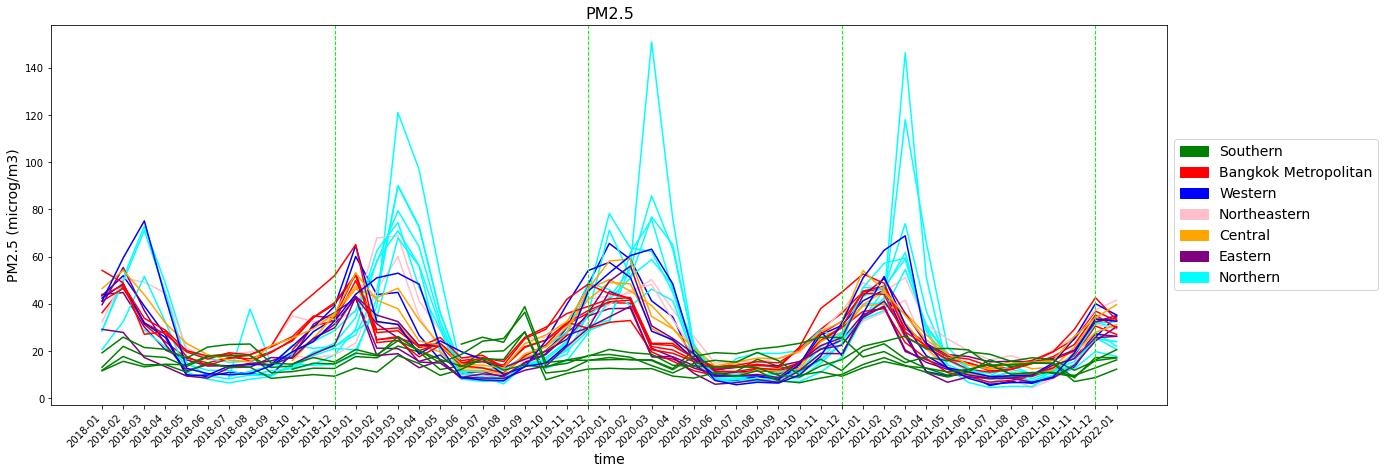

In [39]:
region_mapping = dict(df_province_region.set_index('ProvinceEN')['Region'])
colors = ["green", "red", "blue", "pink", "orange", "purple", "cyan"] #6 regions
color_mapping = dict([(region, color) for (region, color) in zip(df_province_region['Region'].unique(), colors)])

x = np.arange(pm25_year_avg.shape[0])
plt.figure(figsize = (20, 7))
for province in interested_provinces:
    plt.plot(x, pm25_year_avg[province].values, color = color_mapping[region_mapping[province]])

#plot dashed line at the end of the year (Q4)
x_end_year = x[pm25_year_avg.index.month == 12]
for xx in x_end_year:
    plt.axvline(x = xx, linestyle = '--', color = 'lime', linewidth = 1.0)

plt.ylabel('PM2.5 (microg/m3)', fontsize = 14)
plt.xlabel('time', fontsize = 14)
plt.xticks(x, pm25_year_avg.index, rotation = 45, ha = 'right')
plt.title('PM2.5', fontsize = 16)

legend_patches = []
for (region, color) in color_mapping.items():
    legend_patches.append(mpatches.Patch(color = color, label = region))
plt.legend(handles = legend_patches, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize = 14)

plt.show()

# **Use KMeans Clustering to cluster provinces by using average monthly PM2.5 value from 2018-2022**
(Consider only province which has >= 75% non-null data)

In [40]:
THRESH_PROVINCE_KMEANS = 0.75
N_CLUSTERS = 4

interested_provinces_kmeans = pm25_year_avg.columns[(pm25_year_avg.notna().sum(axis = 0) / pm25_year_avg.shape[0]) > THRESH_PROVINCE_KMEANS]

data = pm25_year_avg.loc[:, interested_provinces_kmeans].copy()
print(f'There total of {len(interested_provinces_kmeans)} interested province.')

#we first impute missing by interpolation techniques
data = data.interpolate()

#there are sill some province that PM2.5 data are missing in the beginning, we will impute by filling the mean PM2.5 value
#from other province that locate in the same region (at each month)
missing_province = interested_provinces_kmeans[data.isna().sum(axis = 0) != 0]
for province in missing_province:
    region = region_mapping[province]
    intercept_provinces = list(set(pm25_year_avg.columns).intersection(set(df_province_region.loc[df_province_region['Region'] == region, 'ProvinceEN'])))
    
    for date in data.loc[:, province][data.loc[:, province].isna()].index:
        region_avg_pm25_date = pm25_year_avg.loc[date, intercept_provinces].mean()
        data.loc[date, province] = region_avg_pm25_date

data = data.round(2)
data.head(20)

There total of 29 interested province.


province,Bangkok,Chiang Mai,Chiang Rai,Chonburi,Kanchanaburi,Khon Kaen,Lampang,Lamphun,Loei,Mae Hong Son,...,Rayong,Sa Kaeo,Samut Prakan,Samut Sakhon,Saraburi,Satun,Songkhla,Surat Thani,Tak,Yala
date,,,,,,,,,,,,,,,,,,,,,
2018-01,36.24,28.42,15.46,43.99,43.45,32.28,28.77,29.04,22.58,37.19,...,29.20,26.38,43.43,54.19,46.46,11.87,11.63,14.04,41.18,19.24
2018-02,47.46,51.04,14.32,44.77,51.89,50.96,49.46,25.74,22.06,33.06,...,27.89,25.05,48.04,48.93,54.22,17.71,15.66,13.85,59.43,25.89
2018-03,31.29,72.86,13.19,30.19,39.06,49.14,71.11,22.45,21.54,28.92,...,17.25,23.73,33.86,27.10,43.89,14.18,13.32,13.66,75.14,21.50
2018-04,23.92,48.63,12.06,20.46,26.82,44.60,44.49,19.15,21.01,21.69,...,13.37,22.40,28.83,28.26,31.83,14.23,14.41,13.46,42.52,20.76
2018-05,17.01,20.10,10.92,16.26,9.99,21.21,15.13,15.85,20.49,14.42,...,9.42,21.08,20.17,17.69,23.20,11.06,14.17,13.27,12.71,17.03
2018-06,14.99,16.84,9.78,13.65,9.25,17.10,9.48,12.56,19.97,11.84,...,8.54,19.75,17.88,13.82,18.49,15.04,17.93,13.08,10.42,21.68
2018-07,17.20,15.27,8.65,13.79,10.93,18.61,8.25,9.26,19.45,11.80,...,12.86,18.43,18.82,16.83,16.16,12.98,17.99,12.89,9.97,22.79
2018-08,16.75,15.69,37.81,14.52,10.64,19.61,9.83,11.36,18.92,9.63,...,14.85,17.10,15.63,18.45,15.46,13.18,18.07,12.69,10.40,22.98
2018-09,19.73,13.01,14.66,15.81,9.85,21.93,11.63,13.69,18.40,9.92,...,14.13,15.78,19.32,22.05,22.41,8.40,13.05,12.50,13.80,14.89


In [41]:
X_k_means = np.array(data).T
print(f'X shape = {X_k_means.shape}')

kmeans = KMeans(n_clusters = N_CLUSTERS, random_state = RANDOM_STATE).fit(X_k_means)
print(kmeans.labels_)
print(interested_provinces_kmeans)

X shape = (29, 49)
[1 2 3 1 1 2 2 2 1 3 1 2 0 1 1 1 2 1 1 1 1 1 1 1 0 0 0 2 0]
Index(['Bangkok', 'Chiang Mai', 'Chiang Rai', 'Chonburi', 'Kanchanaburi',
       'Khon Kaen', 'Lampang', 'Lamphun', 'Loei', 'Mae Hong Son',
       'Nakhon Sawan', 'Nan', 'Narathiwat', 'Nonthaburi', 'Pathum Thani',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Prachinburi', 'Ratchaburi',
       'Rayong', 'Sa Kaeo', 'Samut Prakan', 'Samut Sakhon', 'Saraburi',
       'Satun', 'Songkhla', 'Surat Thani', 'Tak', 'Yala'],
      dtype='object', name='province')


In [42]:
def color_mapping(idx):
    COLORS = ['red', 'green', 'blue', 'purple', 'orange', 'black', 'cyan']
    return COLORS[idx]

#create latitude, longitude mapping
lat_mapping = dict(df_province_region.set_index('ProvinceEN')['lat'])
long_mapping = dict(df_province_region.set_index('ProvinceEN')['long'])

latitudes = list(map(lambda province: lat_mapping[province], interested_provinces_kmeans))
longitudes = list(map(lambda province: long_mapping[province], interested_provinces_kmeans))

map_kmeans = folium.Map(
    location = (13.736717, 100.523186),
    zoom_start = 6.2
)

for (province, lat, long, c) in zip(interested_provinces_kmeans, latitudes, longitudes, kmeans.labels_):
    html = f'''<b>{province}</b><br>Region: {region_mapping[province]}'''
    folium.CircleMarker((lat, long), tooltip = html, radius = 6, fill_color = color_mapping(c), color = color_mapping(c)).add_to(map_kmeans)

#save map HTML
MAP_SAVE_PATH = f'{BASE_PROCESSED_DATA_PATH}/clustering_maps'
if not os.path.exists(MAP_SAVE_PATH):
    os.mkdir(MAP_SAVE_PATH)
map_kmeans.save(f'{MAP_SAVE_PATH}/thailand_provinces_clustering.html')

map_kmeans

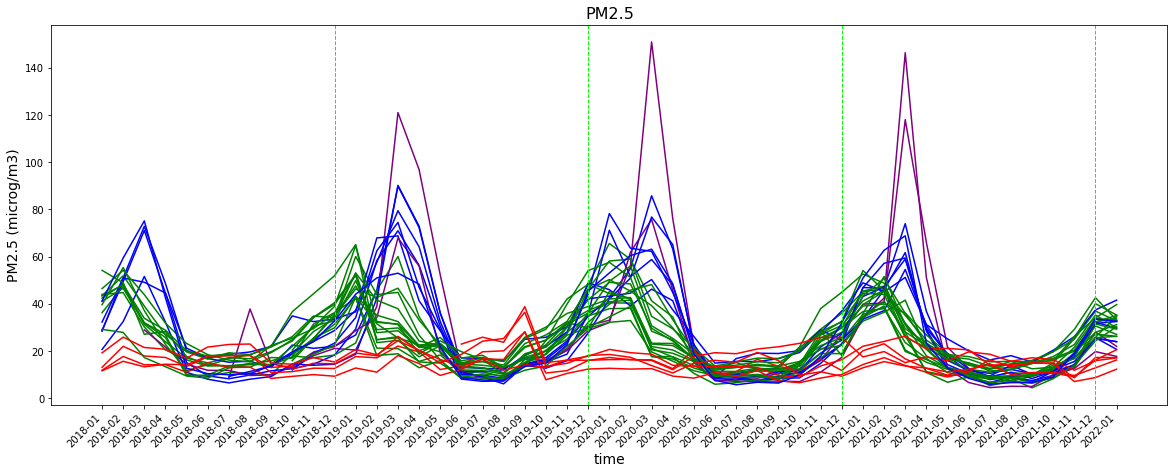

In [43]:
x = np.arange(pm25_year_avg.shape[0])
plt.figure(figsize = (20, 7))
for idx, province in enumerate(interested_provinces):
    plt.plot(x, pm25_year_avg[province].values, color = color_mapping(kmeans.labels_[idx]))

#plot dashed line at the end of the year (Q4)
x_end_year = x[pm25_year_avg.index.month == 12]
for xx in x_end_year:
    plt.axvline(x = xx, linestyle = '--', color = 'lime', linewidth = 1.0)

plt.ylabel('PM2.5 (microg/m3)', fontsize = 14)
plt.xlabel('time', fontsize = 14)
plt.xticks(x, pm25_year_avg.index, rotation = 45, ha = 'right')
plt.title('PM2.5', fontsize = 16)
plt.show()

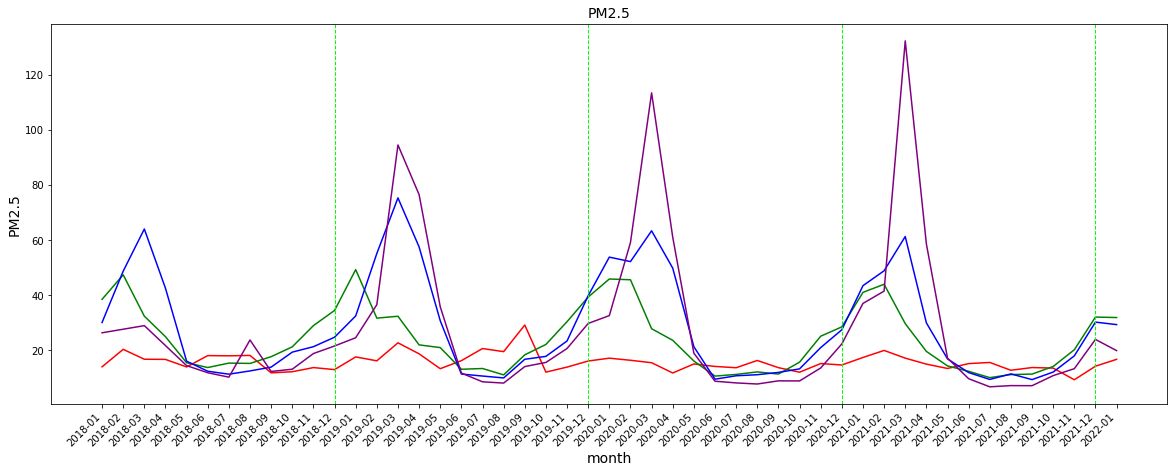

In [44]:
df_province_grouped = pm25_year_avg.loc[:, interested_provinces].T
df_province_grouped['group'] = kmeans.labels_

df_province_grouped_avg = df_province_grouped.groupby('group')[pm25_year_avg.index].mean()

#impute missing by interpolate
df_province_grouped_avg = df_province_grouped_avg.interpolate(axis = 1)

plt.figure(figsize = (20, 7))
x = np.arange(len(df_province_grouped_avg.columns))
for g in df_province_grouped_avg.index:
    plt.plot(x, df_province_grouped_avg.loc[g, :], color = color_mapping(g))

#plot dashed line at the end of the year (Q4)
x_end_year = x[pm25_year_avg.index.month == 12]
for xx in x_end_year:
    plt.axvline(x = xx, linestyle = '--', color = 'lime', linewidth = 1.0)
    
plt.xticks(x, df_province_grouped_avg.columns, rotation = 45, ha = 'right')
plt.xlabel('month', fontsize = 14)
plt.ylabel('PM2.5', fontsize = 14)
plt.title('PM2.5', fontsize = 14)
plt.show()